### Data Pre-Processing

In [1]:
# Importing necessary dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading and analysing the data
df = pd.read_csv('airline-passengers.csv')

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# Since, we are dealing with time series data, its better to convert given data into datetime format (yyyy/mm/dd), it will make our task easy.
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# Setting index column
df.set_index('Month',inplace=True)

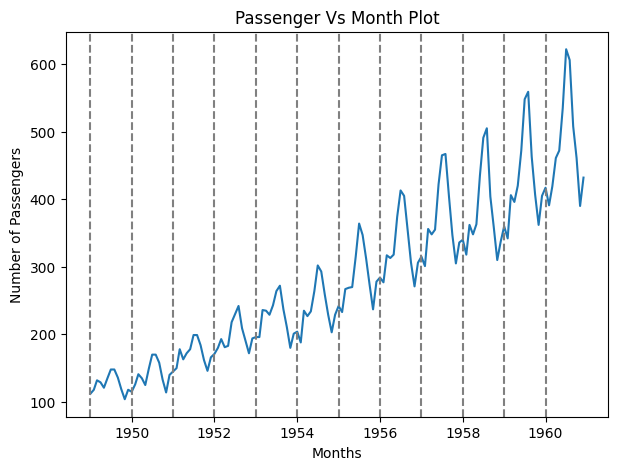

In [10]:
# lets plot it first
plt.figure(figsize=[7,5])
plt.plot(df)
plt.title('Passenger Vs Month Plot')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

# for plotting vertical lines on 1st day of each year for better visualization
first_day = df.index[df.index.is_year_start]
for month in first_day:
    plt.axvline(month,linestyle='--',color='grey')

plt.show()

In [11]:
# clearly given data is not suitable right now (not stationary) to provide to the models. It will reduce model performance. 
# Lets start pre-processing on the data to counter the problem.

# 1. Normalize

avg, std_dev = df.mean(), df.std()

In [12]:
df = (df - avg)/std_dev

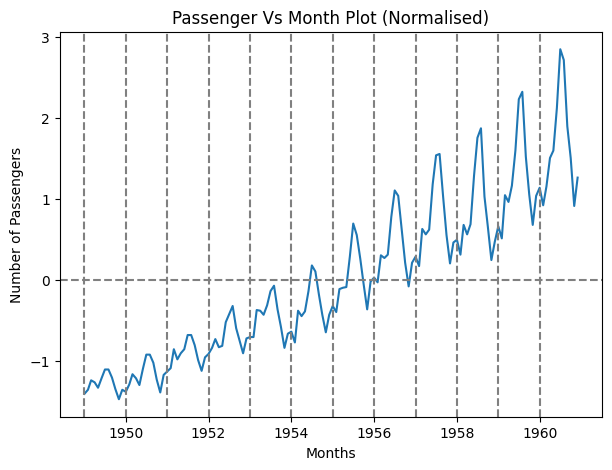

In [13]:
plt.figure(figsize=[7,5])
plt.plot(df)
plt.title('Passenger Vs Month Plot (Normalised)')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

for month in first_day:
    plt.axvline(month, linestyle='--',color='grey')

plt.axhline(0, linestyle = '--', color = 'grey')

plt.show()

In [14]:
# lets remove the trend now. Take the first differences.
df = df.diff().dropna()

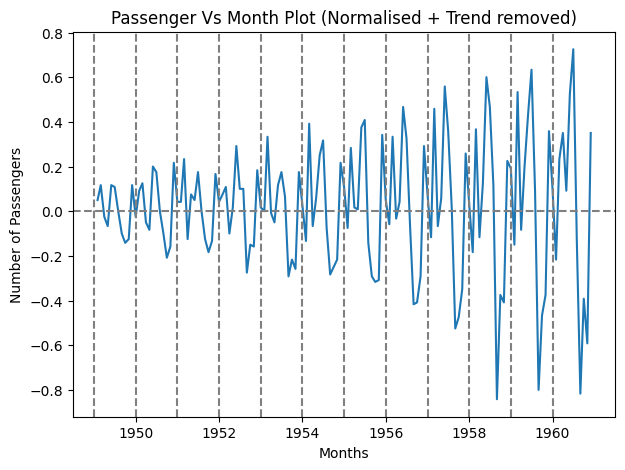

In [15]:
plt.figure(figsize=[7,5])
plt.plot(df)
plt.title('Passenger Vs Month Plot (Normalised + Trend removed)')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

for month in first_day:
    plt.axvline(month, linestyle='--',color='grey')

plt.axhline(0, linestyle = '--', color = 'grey')

plt.show()

In [16]:
# There are uneven fluctuations in the data means data is volatile. Lets remove it.
# Let's first check how volatile the data is.

annual_volatility = df.groupby(df.index.year).std()

In [17]:
annual_volatility

,Passengers
Month,
1949,0.102794
1950,0.143801
1951,0.135943
1952,0.161491
1953,0.188764
1954,0.229725
1955,0.271214
1956,0.294525
1957,0.352086


In [18]:
# In later years, data is more volatile.
# passenger_annual_vol = df.index.map(lambda d: annual_volatility.loc[d.year])
passenger_annual_vol = df.index.to_series().map(lambda d: annual_volatility.loc[d.year, 'Passengers'])


In [19]:
passenger_annual_vol

Month
1949-02-01    0.102794
1949-03-01    0.102794
1949-04-01    0.102794
1949-05-01    0.102794
1949-06-01    0.102794
                ...   
1960-08-01    0.462340
1960-09-01    0.462340
1960-10-01    0.462340
1960-11-01    0.462340
1960-12-01    0.462340
Name: Month, Length: 143, dtype: float64

In [20]:
# df = df / passenger_annual_vol
df['Passengers'] = df['Passengers'] / passenger_annual_vol.values

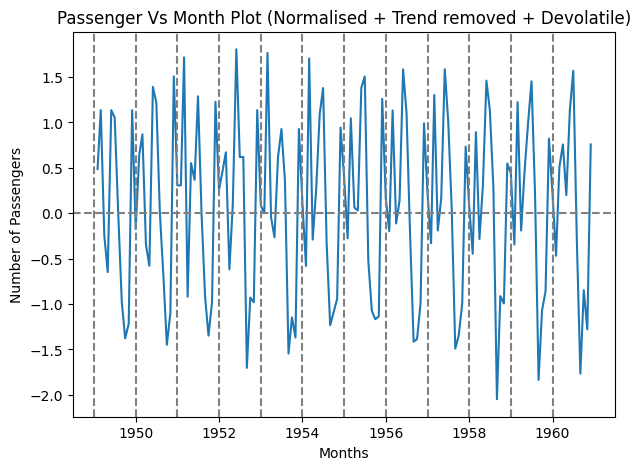

In [21]:
plt.figure(figsize=[7,5])
plt.plot(df)
plt.title('Passenger Vs Month Plot (Normalised + Trend removed + Devolatile)')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

for month in first_day:
    plt.axvline(month, linestyle='--',color='grey')

plt.axhline(0, linestyle = '--', color = 'grey')

plt.show()

In [22]:
# Great! Its done now. Our data is almost ready. One factor is remained which is seasonality. We need to remove seasonality in order to provide the data to our models.

In [23]:
# lets generate 1st file.
df.to_csv('airline_passengers_with_Seasonality.csv')

In [24]:
# now lets remove seasonality. you can see the seasonal pattern during each year from start of the year. Seasonality removal is same like trend removal, just instead of taking 1st difference, we take difference in season (where season start). 

# In our case it is occuring entire year so, we will reduce 365 days from current day.


In [25]:
df_seasonal_diff = df.diff(12).dropna()

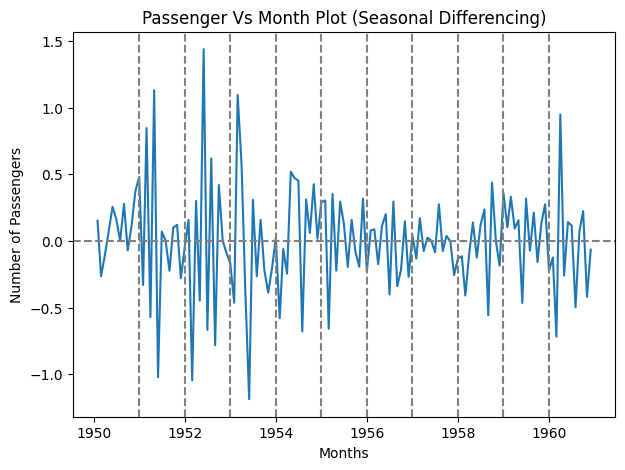

In [26]:
plt.figure(figsize=[7,5])
plt.plot(df_seasonal_diff)
plt.title('Passenger Vs Month Plot (Seasonal Differencing)')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')

# Highlight the vertical lines for each year's start
first_day = df_seasonal_diff.index[df_seasonal_diff.index.is_year_start]
for month in first_day:
    plt.axvline(month, linestyle='--', color='grey')

plt.axhline(0, linestyle='--', color='grey')
plt.show()

In [27]:
# Now our data is ready!
# lets generate this file too.
df_seasonal_diff.to_csv('airline_passengers_Without_Seasonality.csv')

In [28]:
# Here preprocessing completed.